In [1]:
import warnings
warnings.filterwarnings('ignore')

import pickle
transformed_df = pickle.load(open("dataframe.p","r"))

X = transformed_df.drop('loan_status', axis=1)
Y= transformed_df['loan_status']



## Upsampling dataset to balance both the classes

##### In this Notebook I try out the performance of the classification algorithm by Upsampling the minority group by repeated sampling until equal representation

In [2]:
import numpy as np
x_new = []
y_new = []
X = np.array(X)
Y = np.array(Y)
for i in xrange(len(X)):
    if Y[i] == 1:
        for j in range(14):
            x_new.append(X[i])
            y_new.append(Y[i])
    else:
        x_new.append(X[i])
        y_new.append(Y[i])

In [5]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x_new,y_new, test_size=0.3, random_state=1)

### Logistic Regression Performance on upsampled data

##### Fit a Logistic Regression Model with L1 Norm and checked the performance by Accuracy, Precision, Recall, F1-Score and AUC curve. I use 5-fold Cross Validation to ensure that the model doesn't overfit and take the max of the avg. cv score. 
##### I have used the best result in this after running the model with different parameter settings.

In [6]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l1')
features = model.fit(X_train, y_train)
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)
print "Accuray of Logistic Regression Classifier is = ", sklearn.metrics.accuracy_score(y_test, predicted)
print "Roc auc score = ", sklearn.metrics.roc_auc_score(y_test, predicted)
print "Confusion Matrix \n", sklearn.metrics.confusion_matrix(y_test, predicted)
print "Classification Report \n",sklearn.metrics.classification_report(y_test, predicted)
scores = cross_val_score(model, X, Y, cv = 5)
print "Cross validation score", scores.mean()

Accuray of Logistic Regression Classifier is =  0.682043362998
Roc auc score =  0.682106318558
Confusion Matrix 
[[40102 15813]
 [19808 36308]]
Classification Report 
             precision    recall  f1-score   support

          0       0.67      0.72      0.69     55915
          1       0.70      0.65      0.67     56116

avg / total       0.68      0.68      0.68    112031

Cross validation score 0.932771301131


In [9]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,probs[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

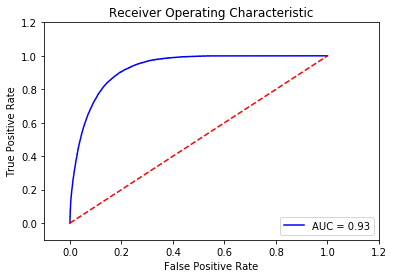

In [10]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Random Forest Classifier on upsampled data
###### Here I fit a Random Forest Model and Check the classification performance based on the parameters mentioned above. 
###### The result shown is with the best fit model by the avg. cv score. The Approach in figuring out the performance was using different combinations for the estimators,depth and features.

In [7]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random
model2 = RandomForestClassifier(n_estimators=30,max_depth=15,max_features=30)
features = model2.fit(X_train, y_train)
importances = features.feature_importances_
indices = np.argsort(importances)[::-1]
predicted = model2.predict(X_test)
probs = model2.predict_proba(X_test)



In [4]:
print "Accuracy of Random Forest Classifier", sklearn.metrics.accuracy_score(y_test, predicted)
print "roc auc score of Random Forest Classifier", sklearn.metrics.roc_auc_score(y_test, predicted)
print "confusion Matrix", sklearn.metrics.confusion_matrix(y_test, predicted)
print "classification report", sklearn.metrics.classification_report(y_test, predicted)
scores = cross_val_score(model2, x_new, y_new, cv = 5)
print "Mean score of cross validation", scores.mean()

Accuracy of Random Forest Classifier 0.840142460569
roc auc score of Random Forest Classifier 0.839915801256
confusion Matrix [[39900 16015]
 [ 1894 54222]]
classification report              precision    recall  f1-score   support

          0       0.95      0.71      0.82     55915
          1       0.77      0.97      0.86     56116

avg / total       0.86      0.84      0.84    112031

Mean score of cross validation 0.676771086232


In [163]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,probs[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)


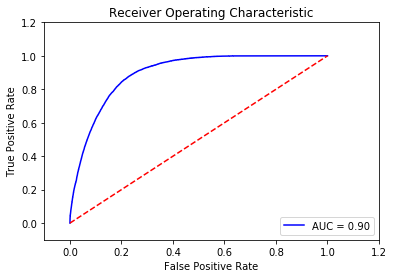

In [164]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Result  :
##### In case of Over Sampling, Random Forest performance the best with a AUC of 0.9, Accuracy of around 84% and 0.82 avg.precision score and 0.86 recall score